In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

import joblib


In [2]:
df_dogs = pd.read_csv("dogs_cleaned.csv")
df_people = pd.read_excel("recommended_dog_breeds.xlsx")

In [3]:
df_dogs.shape

(391, 41)

In [4]:
df_dogs.head()

,Breed Name,Detailed Description Link,Dog Size,Dog Breed Group,Height,"Avg. Height, cm",Weight,"Avg. Weight, kg",Life Span,"Avg. Life Span, years",...,Intelligence,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Physical Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness
0,Afador,https://dogtime.com/dog-breeds/afador,Very Large,Mixed Breed Dogs,20 to 29 inches,62.23,50 to 75 pounds,28.12,10 to 12 years,11,...,5,4,4.0,4.0,4,4.00,4,4,4,3
1,Affenhuahua,https://dogtime.com/dog-breeds/affenhuahua,Small,Mixed Breed Dogs,6 to 12 inches,22.86,4 to 12 pounds,3.60,13 to 18 years,16,...,3,4,2.0,4.0,2,3.33,4,3,3,3
2,Affenpinscher,https://dogtime.com/dog-breeds/affenpinscher,Small,Companion Dogs,9 to 11 inches tall at the shoulder,25.40,7 to 9 pounds,3.60,12 to 14 years,13,...,4,4,3.0,2.0,2,3.33,4,3,3,4
3,Afghan Hound,https://dogtime.com/dog-breeds/afghan-hound,Very Large,Hound Dogs,24 to 26 inches tall at the shoulder,63.50,50 to 60 pounds,24.75,10 to 12 years,11,...,4,3,5.0,2.0,5,3.67,5,2,4,4
4,Airedale Terrier,https://dogtime.com/dog-breeds/airedale-terrier,Very Large,Terrier Dogs,21 to 23 inches tall at the shoulder,55.88,40 to 65 pounds,23.62,10 to 13 years,12,...,5,5,5.0,4.0,4,4.33,5,3,5,5


In [5]:
df_dogs.describe()

,"Avg. Height, cm","Avg. Weight, kg","Avg. Life Span, years",Adaptability,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,...,Intelligence,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Physical Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,...,391.000000,391.000000,390.000000,390.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,46.798926,22.050997,12.593350,2.966752,2.989770,2.790281,3.675192,2.081841,3.296675,2.987212,...,4.092072,3.030691,3.410256,3.094872,3.179028,3.787801,4.056266,3.324808,3.982097,4.268542
std,15.277867,15.447184,1.551131,0.516218,1.481475,1.177571,0.864913,0.916209,1.156460,0.892901,...,0.717341,0.952233,1.165440,1.126326,1.195577,0.764186,0.872312,0.984169,0.943092,0.814615
min,15.240000,2.020000,7.000000,1.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.670000,1.000000,1.000000,1.000000,1.000000
25%,34.290000,9.000000,12.000000,2.600000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,...,4.000000,2.000000,3.000000,2.000000,2.000000,3.330000,4.000000,3.000000,3.000000,4.000000
50%,48.260000,21.150000,12.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,59.690000,29.365000,14.000000,3.400000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,4.330000,5.000000,4.000000,5.000000,5.000000
max,85.090000,81.000000,17.000000,4.400000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Breed Name                       391 non-null    object 
 1   Detailed Description Link        391 non-null    object 
 2   Dog Size                         391 non-null    object 
 3   Dog Breed Group                  391 non-null    object 
 4   Height                           391 non-null    object 
 5   Avg. Height, cm                  391 non-null    float64
 6   Weight                           391 non-null    object 
 7   Avg. Weight, kg                  391 non-null    float64
 8   Life Span                        391 non-null    object 
 9   Avg. Life Span, years            391 non-null    int64  
 10  Adaptability                     391 non-null    float64
 11  Adapts Well To Apartment Living  391 non-null    int64  
 12  Good For Novice Owners

In [7]:
df_dogs.isna().sum().sort_values(ascending=False)


Drooling Potential                 1
Tendency To Bark Or Howl           1
Prey Drive                         1
Breed Name                         0
Easy To Train                      0
Amount Of Shedding                 0
Easy To Groom                      0
General Health                     0
Potential For Weight Gain          0
Size                               0
Trainability                       0
Intelligence                       0
Friendly Toward Strangers          0
Potential For Mouthiness           0
Wanderlust Potential               0
Physical Needs                     0
Energy Level                       0
Intensity                          0
Exercise Needs                     0
Health And Grooming Needs          0
Dog Friendly                       0
Detailed Description Link          0
Kid-Friendly                       0
Dog Size                           0
Dog Breed Group                    0
Height                             0
Avg. Height, cm                    0
W

In [8]:
df_dogs = df_dogs.dropna()

In [9]:
df_dogs.isnull().sum()

Breed Name                         0
Detailed Description Link          0
Dog Size                           0
Dog Breed Group                    0
Height                             0
Avg. Height, cm                    0
Weight                             0
Avg. Weight, kg                    0
Life Span                          0
Avg. Life Span, years              0
Adaptability                       0
Adapts Well To Apartment Living    0
Good For Novice Owners             0
Sensitivity Level                  0
Tolerates Being Alone              0
Tolerates Cold Weather             0
Tolerates Hot Weather              0
All Around Friendliness            0
Affectionate With Family           0
Kid-Friendly                       0
Dog Friendly                       0
Friendly Toward Strangers          0
Health And Grooming Needs          0
Amount Of Shedding                 0
Drooling Potential                 0
Easy To Groom                      0
General Health                     0
P

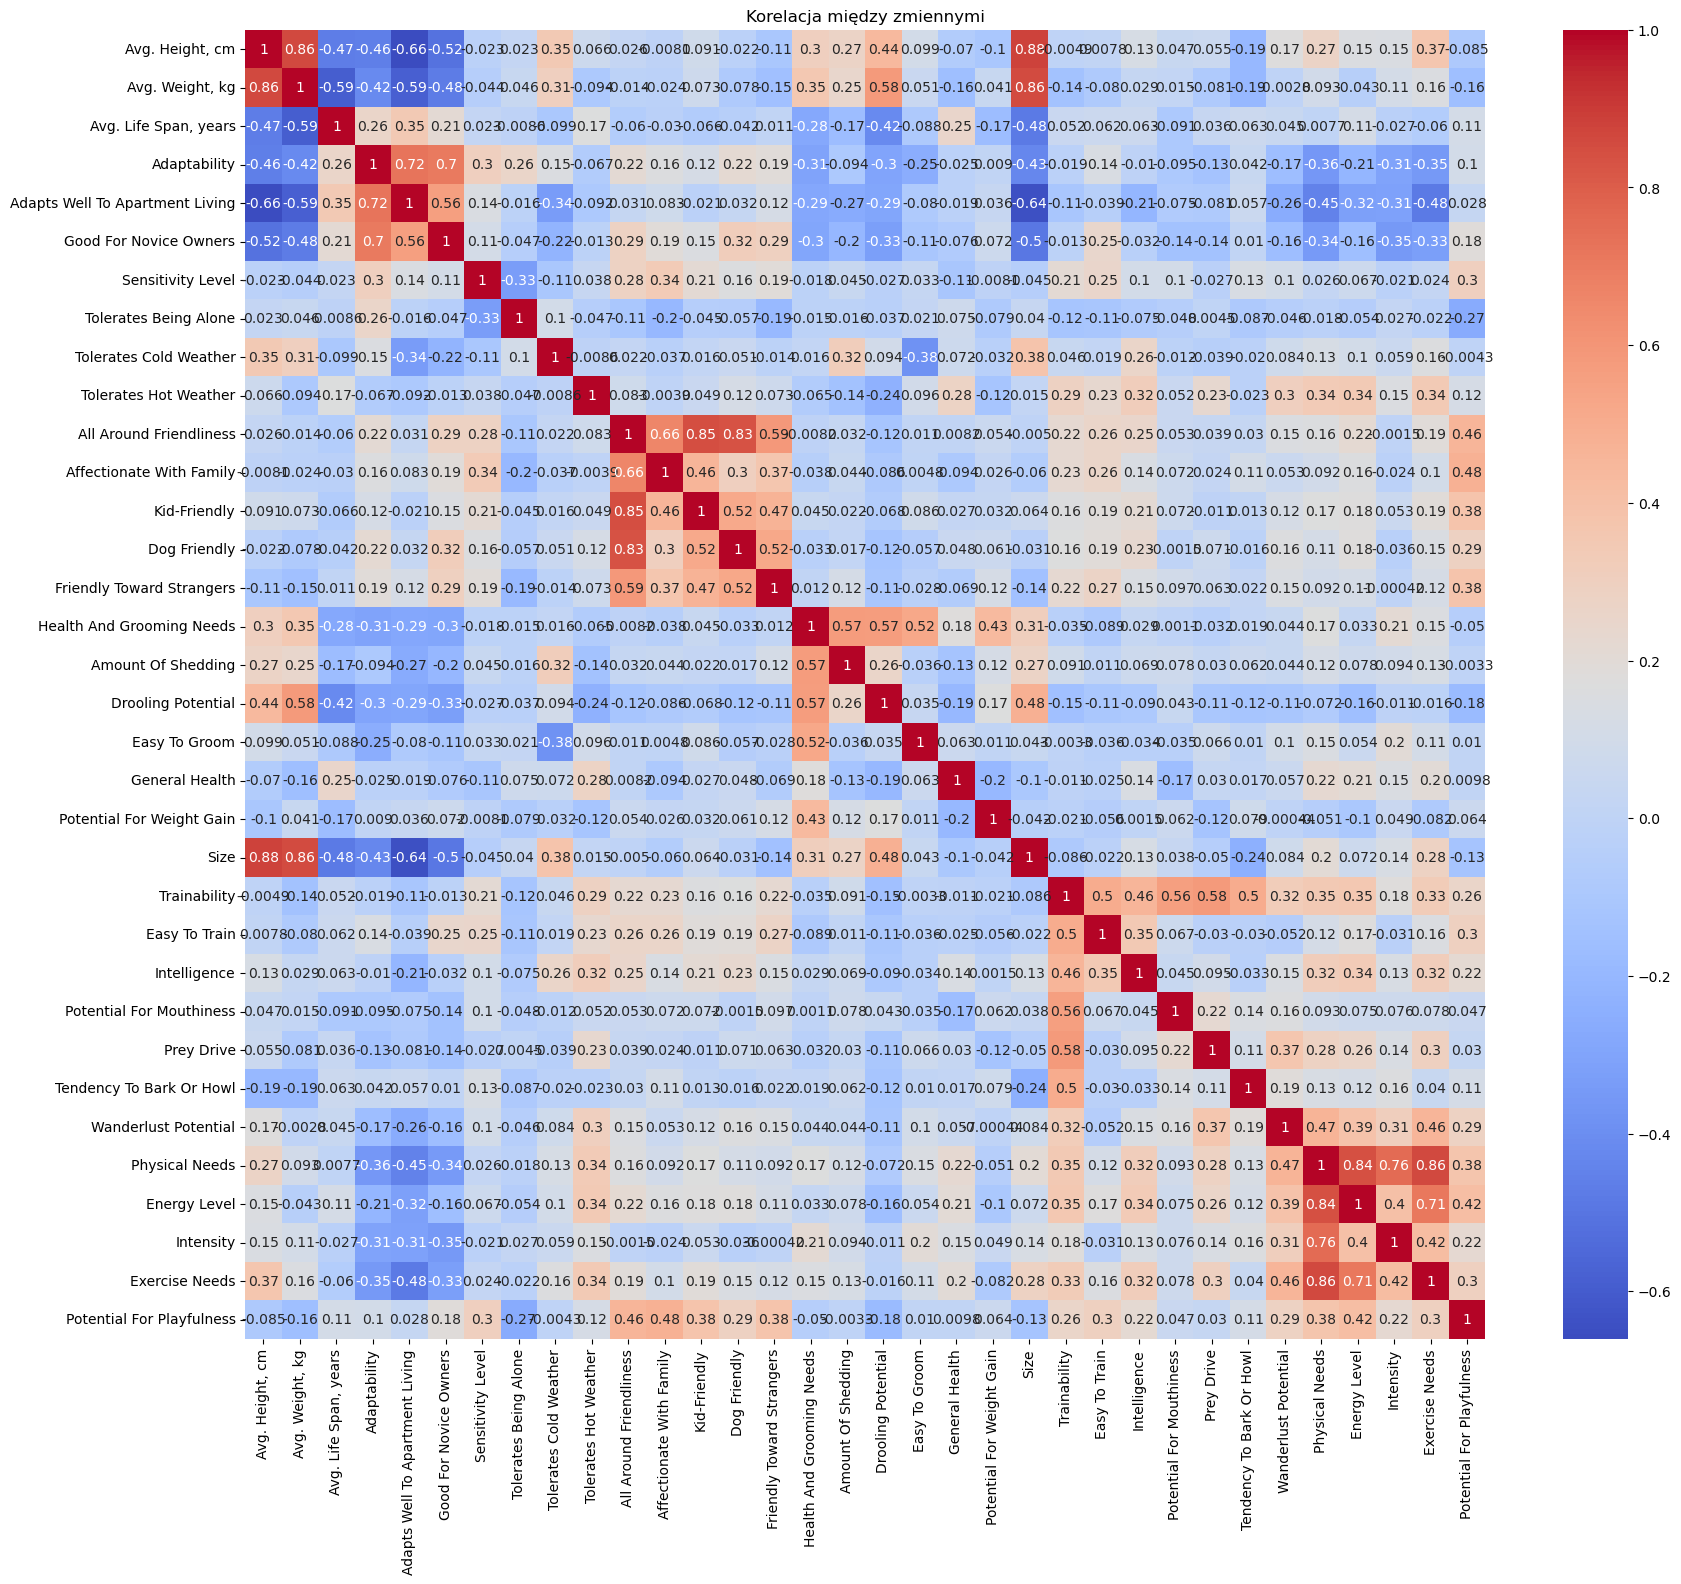

In [10]:
plt.figure(figsize=(20, 17))
sns.heatmap(df_dogs.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelacja między zmiennymi")
plt.show()

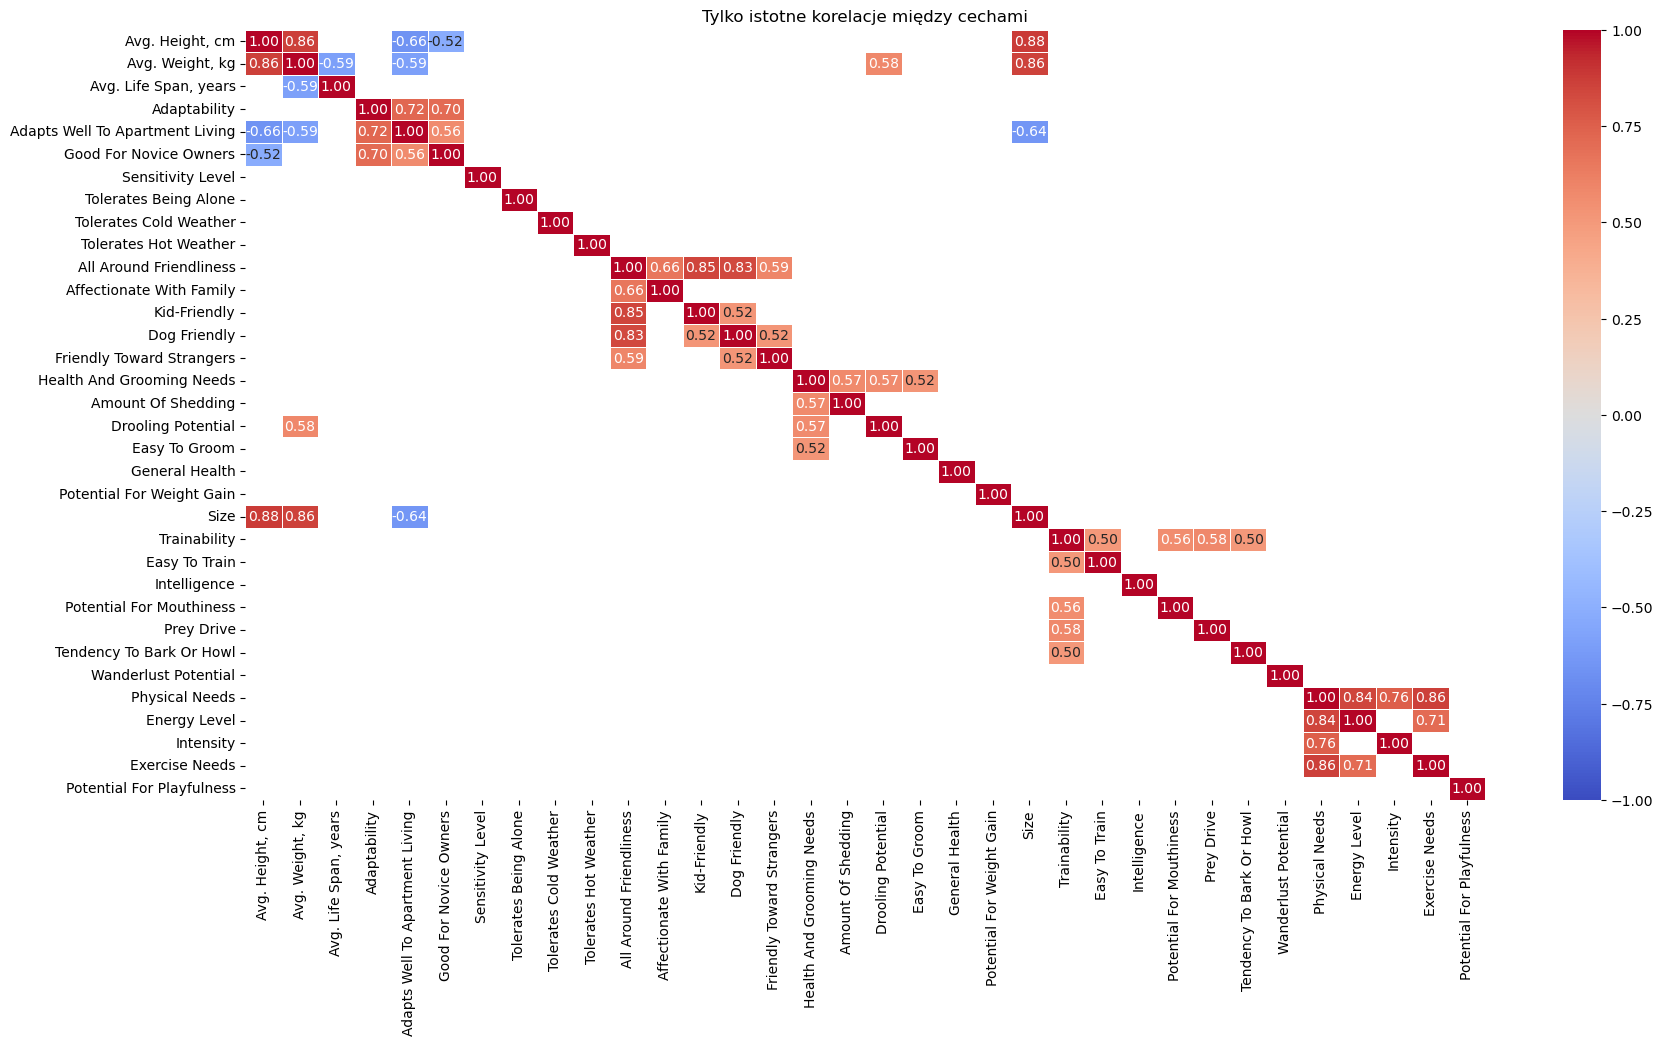

In [11]:
corr_matrix = df_dogs.corr(numeric_only=True)
threshold = 0.5

mask = (corr_matrix.abs() < threshold)

filtered_corr = corr_matrix[(corr_matrix.abs() > threshold)]

plt.figure(figsize=(20,10))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Tylko istotne korelacje między cechami")
plt.show()





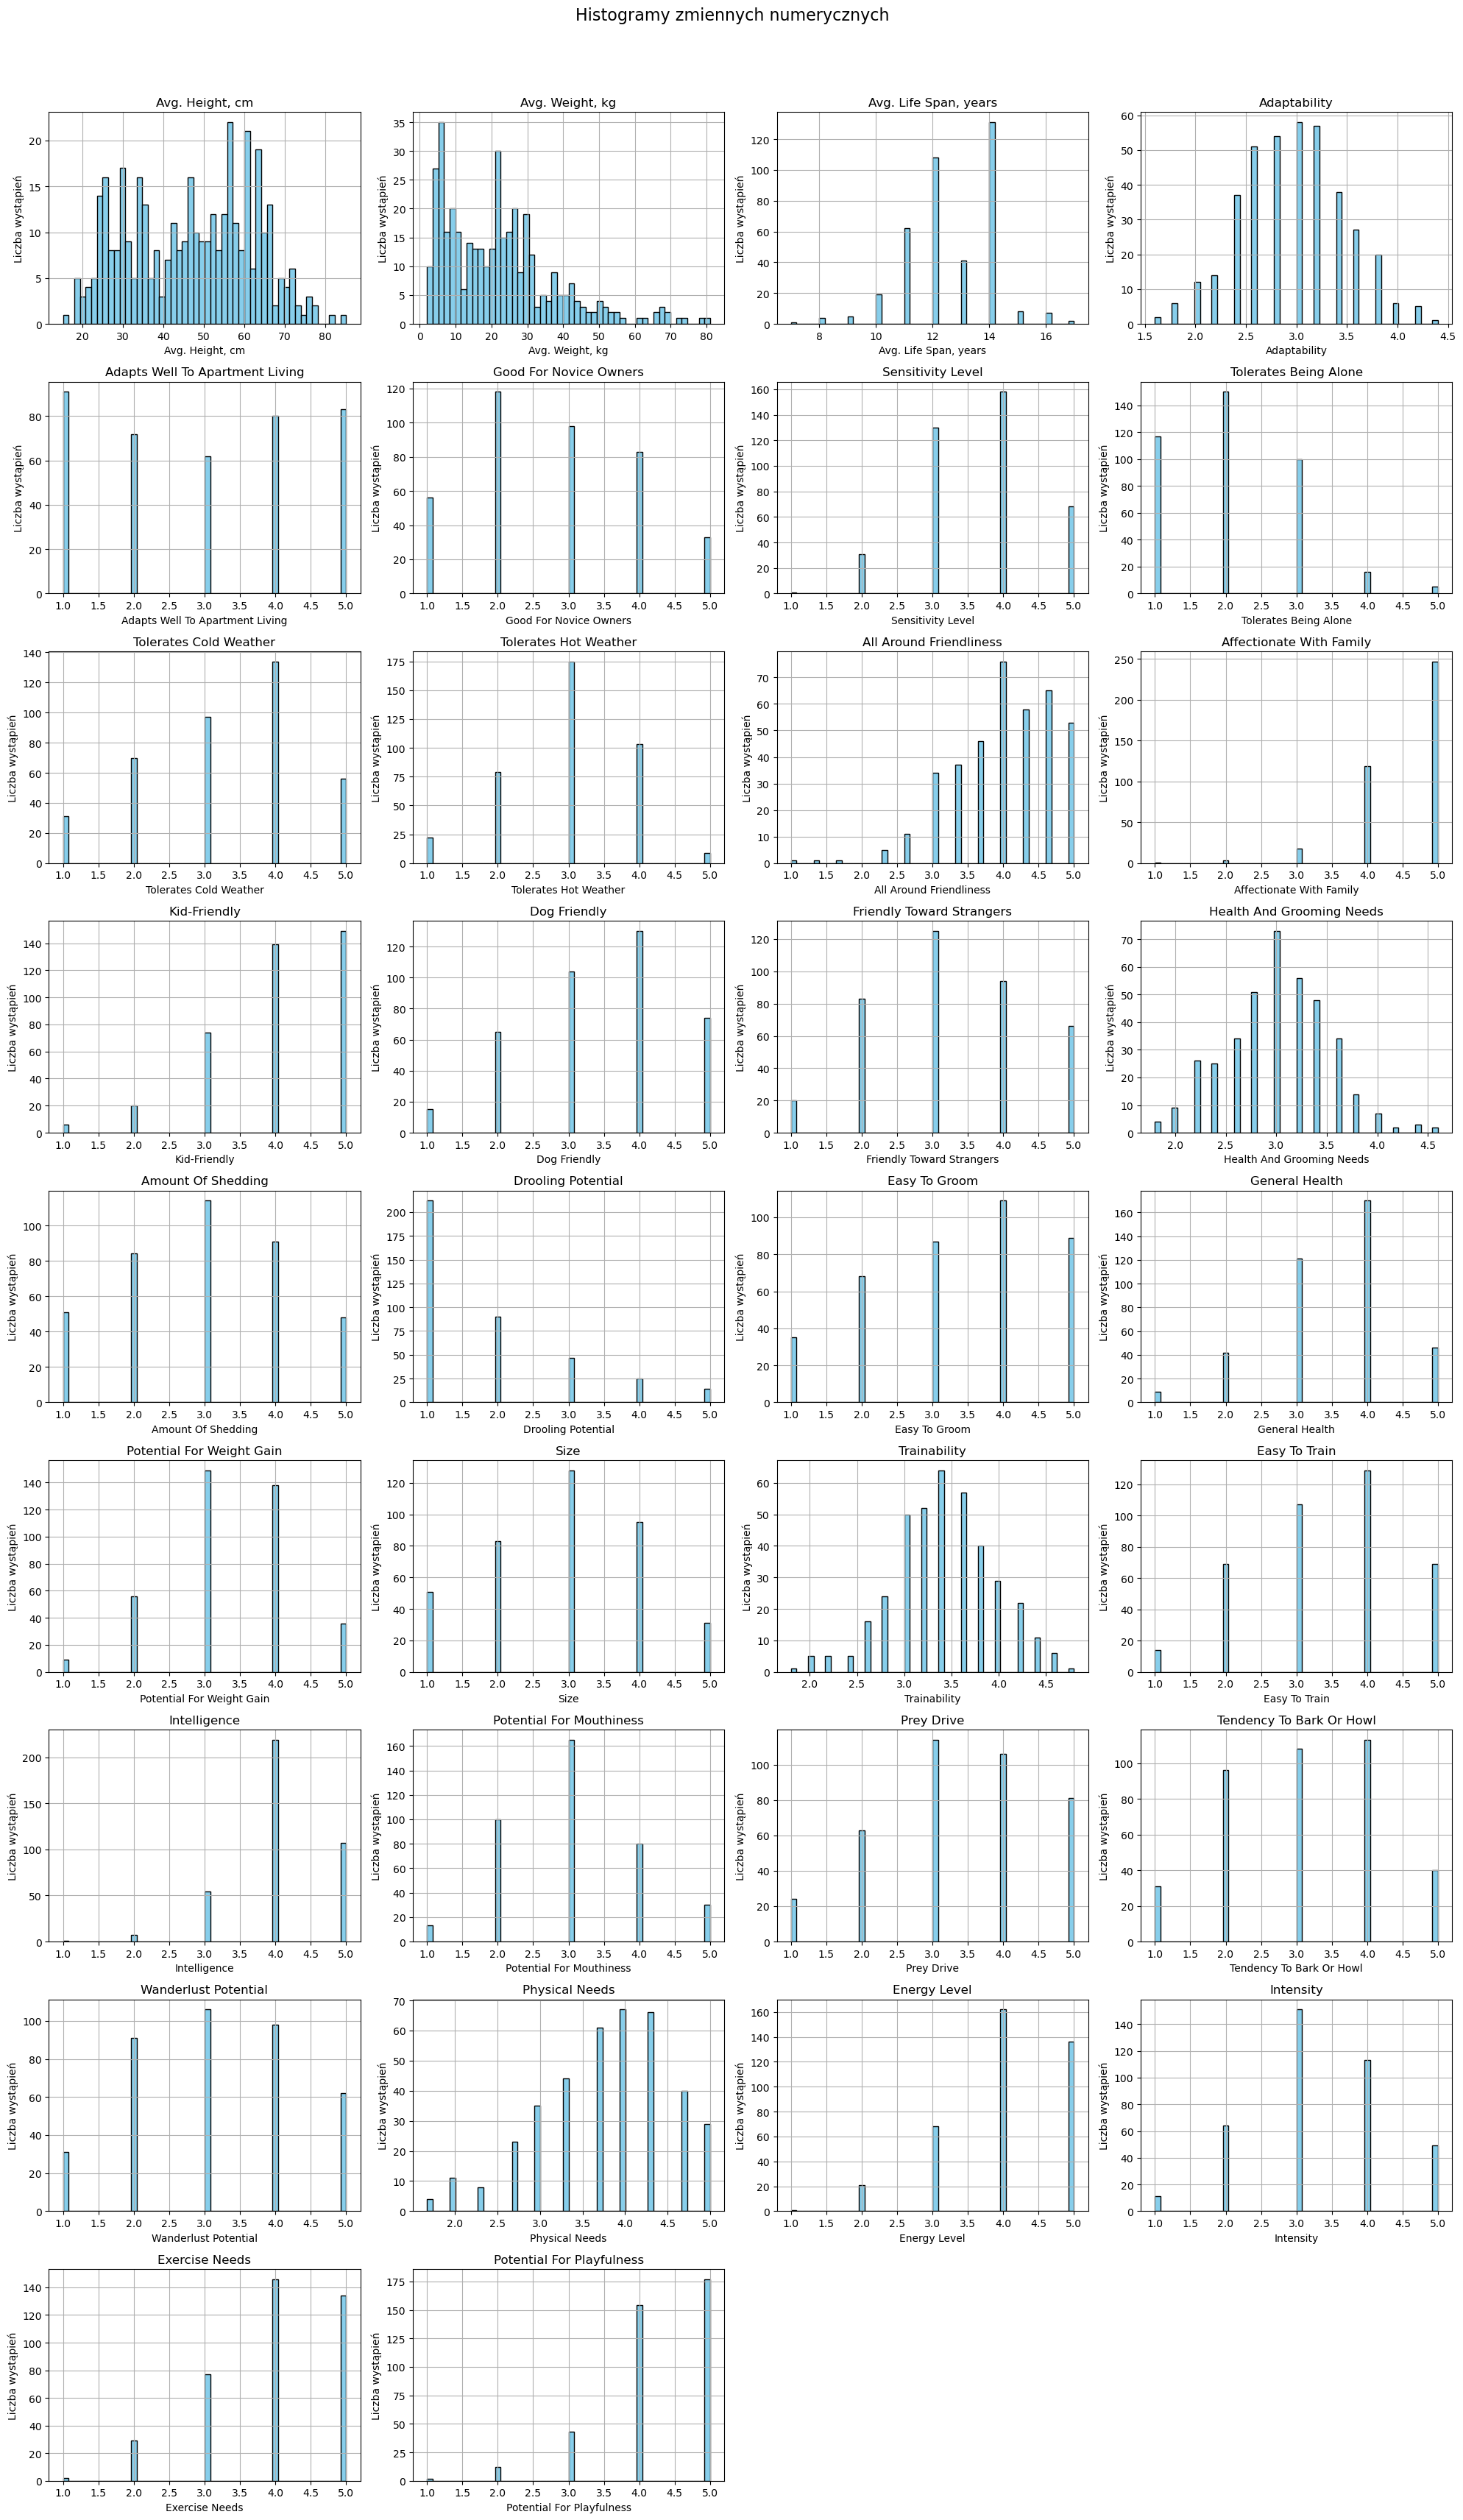

In [12]:
numeric_df = df_dogs.select_dtypes(include=np.number)

num_features = len(numeric_df.columns)
cols = 4 
rows = int(np.ceil(num_features / cols))

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(numeric_df.columns):
    plt.subplot(rows, cols, i + 1)
    plt.hist(numeric_df[col].dropna(), bins=50, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Liczba wystąpień")
    plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Histogramy zmiennych numerycznych", fontsize=16)
plt.show()

In [13]:
df_dogs.columns.tolist()

['Breed Name',
 'Detailed Description Link',
 'Dog Size',
 'Dog Breed Group',
 'Height',
 'Avg. Height, cm',
 'Weight',
 'Avg. Weight, kg',
 'Life Span',
 'Avg. Life Span, years',
 'Adaptability',
 'Adapts Well To Apartment Living',
 'Good For Novice Owners',
 'Sensitivity Level',
 'Tolerates Being Alone',
 'Tolerates Cold Weather',
 'Tolerates Hot Weather',
 'All Around Friendliness',
 'Affectionate With Family',
 'Kid-Friendly',
 'Dog Friendly',
 'Friendly Toward Strangers',
 'Health And Grooming Needs',
 'Amount Of Shedding',
 'Drooling Potential',
 'Easy To Groom',
 'General Health',
 'Potential For Weight Gain',
 'Size',
 'Trainability',
 'Easy To Train',
 'Intelligence',
 'Potential For Mouthiness',
 'Prey Drive',
 'Tendency To Bark Or Howl',
 'Wanderlust Potential',
 'Physical Needs',
 'Energy Level',
 'Intensity',
 'Exercise Needs',
 'Potential For Playfulness']

c:\Users\annze\New folder\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\annze\New folder\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\annze\New folder\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\annze\New folder\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\annze\New folder\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

Cluster
1    114
0    100
2     95
3     79
Name: count, dtype: int64


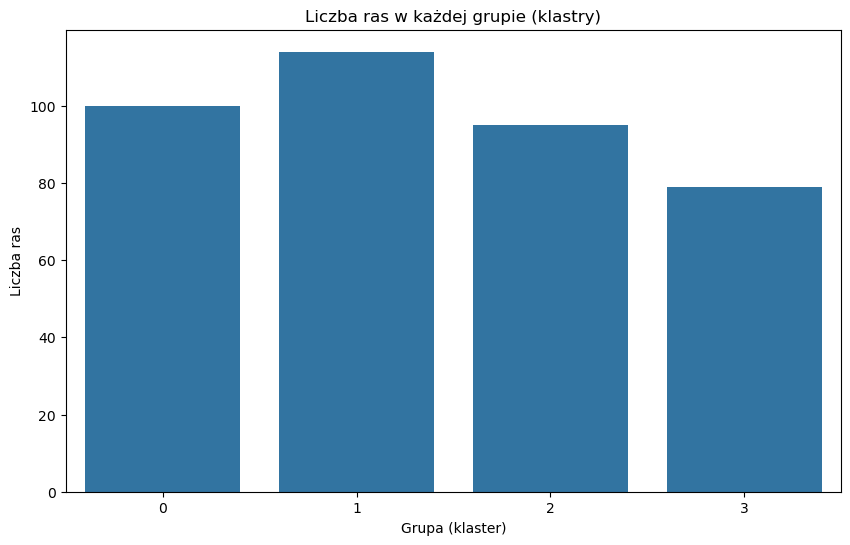

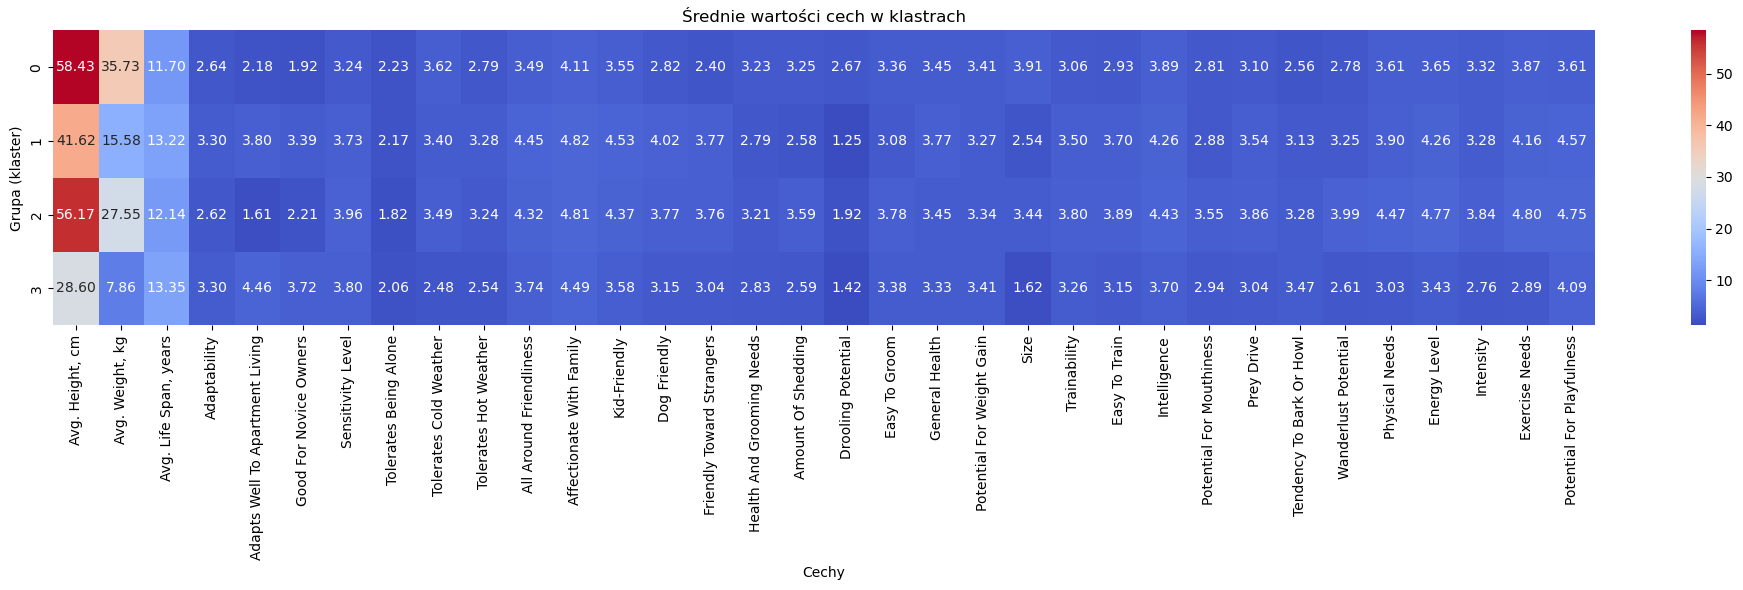

In [14]:
numerical_df_dogs = df_dogs.select_dtypes(include='number')

scaler = StandardScaler()
scaled = scaler.fit_transform(numerical_df_dogs)

kmeans = KMeans(n_clusters=4, random_state=42)
df_dogs["Cluster"] = kmeans.fit_predict(scaled)

print(df_dogs["Cluster"].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x="Cluster", data=df_dogs)
plt.title("Liczba ras w każdej grupie (klastry)")
plt.xlabel("Grupa (klaster)")
plt.ylabel("Liczba ras")
plt.show()

cluster_summary = df_dogs.groupby("Cluster")[numerical_df_dogs.columns].mean()

plt.figure(figsize=(20, 6))
sns.heatmap(cluster_summary.drop(columns=['Cluster'], errors='ignore'), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Średnie wartości cech w klastrach")
plt.xlabel("Cechy")
plt.ylabel("Grupa (klaster)")
plt.tight_layout()
plt.show()

In [15]:
physical_features = [
    'Avg. Height, cm',
    'Avg. Weight, kg',
    'Avg. Life Span, years',
    'Size',
    'Potential For Weight Gain'
]

behavioral_features = [
    'Adaptability',
    'Adapts Well To Apartment Living',
    'Good For Novice Owners',
    'Sensitivity Level',
    'Tolerates Being Alone',
    'Tolerates Cold Weather',
    'Tolerates Hot Weather',
    'All Around Friendliness',
    'Affectionate With Family',
    'Kid-Friendly',
    'Dog Friendly',
    'Friendly Toward Strangers',
    'Health And Grooming Needs',
    'Amount Of Shedding',
    'Drooling Potential',
    'Easy To Groom',
    'General Health',
    'Trainability',
    'Easy To Train',
    'Intelligence',
    'Potential For Mouthiness',
    'Prey Drive',
    'Tendency To Bark Or Howl',
    'Wanderlust Potential',
    'Energy Level',
    'Intensity',
    'Exercise Needs',
    'Potential For Playfulness'
]

In [18]:
features = physical_features + behavioral_features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dogs[features])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df_dogs['PCA1'] = pca_result[:, 0]
df_dogs['PCA2'] = pca_result[:, 1]

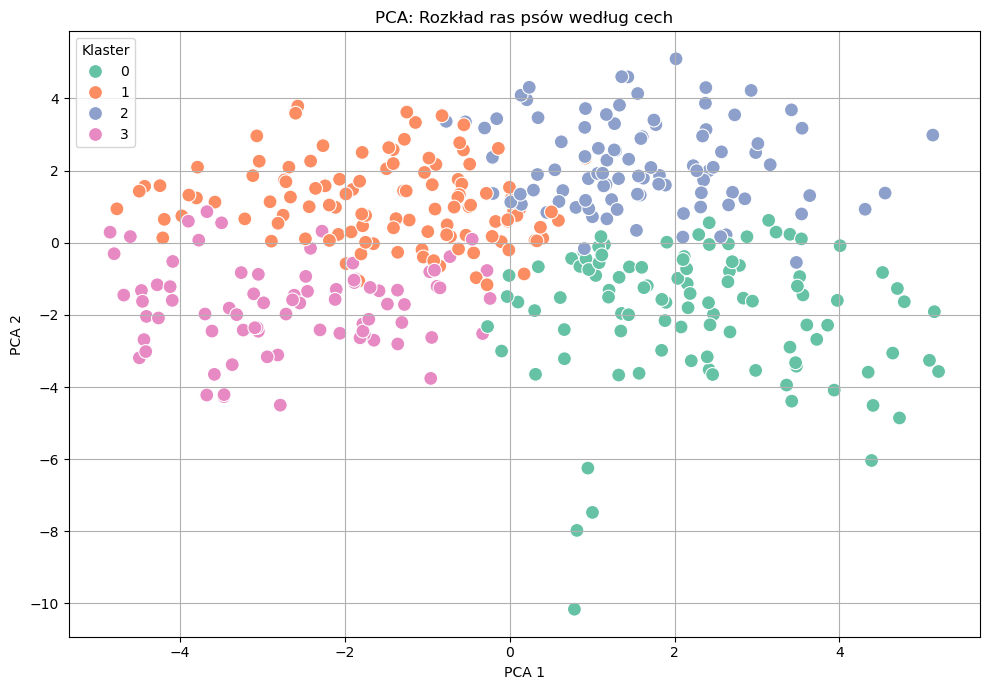

In [19]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_dogs, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('PCA: Rozkład ras psów według cech')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Klaster')
plt.grid(True)
plt.tight_layout()
plt.show()

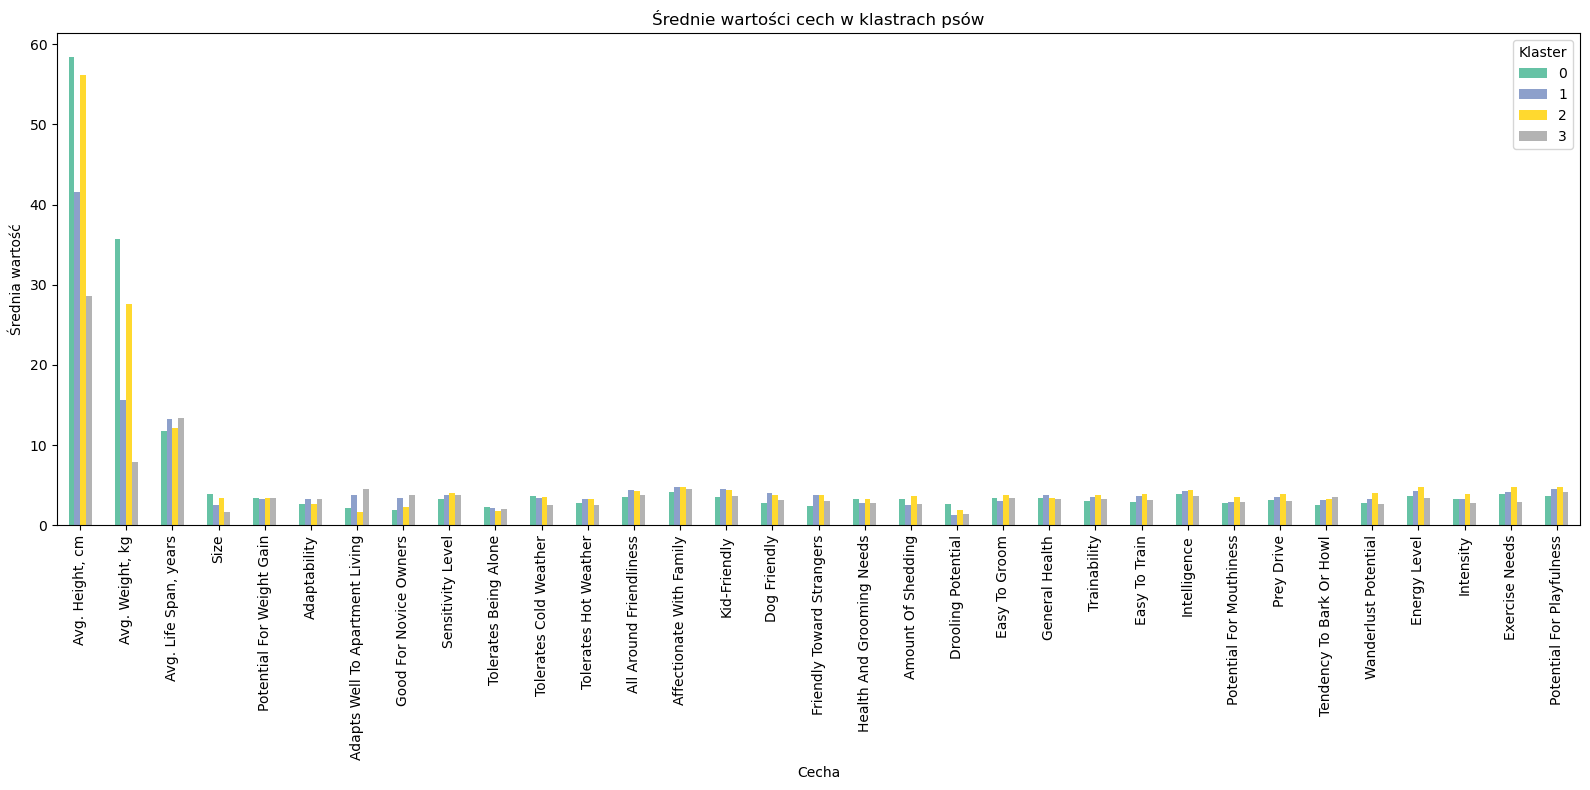

In [ ]:
cluster_summary = df_dogs.groupby('Cluster')[features].mean()

cluster_summary.T.plot(kind='bar', figsize=(16, 8), colormap='Set2')
plt.title("Średnie wartości cech w klastrach psów")
plt.ylabel("Średnia wartość")
plt.xlabel("Cecha")
plt.legend(title='Klaster')
plt.tight_layout()
plt.show()

In [ ]:
df = pd.merge(df_people, df_dogs, left_on="Recommended Breed", right_on="Breed Name")

In [ ]:
user_features = [
    'Lifestyle', 'Has Children or Pets', 'Daily Time for Dog',
    'Can Tolerate Alone Time', 'Valued Trait', 'Preferred Size',
    'Long Lifespan Important', 'Care and Health Time',
    'Friendly to Strangers', 'Housing_Type'
]

X = df[user_features]
y = df["Breed Name"] 

# ENCODING
# Podział na zmienne kategoryczne i liczbowe
kategorie = X.select_dtypes(include="object").columns.tolist()
liczbowe = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# OneHotEncoder dla zmiennych kategorycznych
column_transformer = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), kategorie)
    ],
    remainder="passthrough"  # liczby zostaną nietknięte
)

# PODZIAŁ NA TRAIN/TEST 
X_encoded = column_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
X_encoded = column_transformer.fit_transform(X)

# Zakoduj etykiety ras psów do liczb
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# XGBoost 
model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", verbosity=0)

# GridSearchCV – tuning
param_grid = {
    'n_estimators': [100],
    'max_depth': [4, 6],
    'learning_rate': [0.1, 0.3]
}

grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

# Najlepszy model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Wyniki
print("\nNajlepsze parametry:", grid.best_params_)
print("Dokładność (accuracy):", round(accuracy_score(y_test, y_pred), 4))
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred, zero_division=0))

import joblib
joblib.dump(best_model, "model_xgboost.pkl")
joblib.dump(column_transformer, "encoder.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

Fitting 3 folds for each of 4 candidates, totalling 12 fits

Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Dokładność (accuracy): 0.112

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.11      0.14      0.12        87
           1       0.15      0.19      0.17        96
           2       0.06      0.06      0.06       103
           3       0.11      0.08      0.09        99
           4       0.13      0.13      0.13       112
           5       0.12      0.11      0.12       106
           6       0.09      0.10      0.09        91
           7       0.16      0.12      0.13       113
           8       0.08      0.08      0.08        95

    accuracy                           0.11       902
   macro avg       0.11      0.11      0.11       902
weighted avg       0.11      0.11      0.11       902



['label_encoder.pkl']

In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', verbose=1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nRandomForest - Best params:", grid_rf.best_params_)
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))


Fitting 3 folds for each of 12 candidates, totalling 36 fits

RandomForest - Best params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.1109

Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.10      0.10        87
           1       0.17      0.20      0.18        96
           2       0.09      0.10      0.09       103
           3       0.07      0.06      0.07        99
           4       0.12      0.12      0.12       112
           5       0.15      0.17      0.16       106
           6       0.07      0.07      0.07        91
           7       0.15      0.12      0.13       113
           8       0.06      0.05      0.05        95

    accuracy                           0.11       902
   macro avg       0.11      0.11      0.11       902
weighted avg       0.11      0.11      0.11       902



In [ ]:
cat = CatBoostClassifier(verbose=0, random_state=42)

param_grid_cat = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'iterations': [100, 200]
}

grid_cat = GridSearchCV(cat, param_grid_cat, cv=3, scoring='accuracy', verbose=1)
grid_cat.fit(X_train, y_train)

best_cat = grid_cat.best_estimator_
y_pred_cat = best_cat.predict(X_test)

print("\nCatBoost - Best params:", grid_cat.best_params_)
print("Accuracy:", round(accuracy_score(y_test, y_pred_cat), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat, zero_division=0))

Fitting 3 folds for each of 12 candidates, totalling 36 fits

CatBoost - Best params: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
Accuracy: 0.1053

Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.06      0.05        87
           1       0.18      0.18      0.18        96
           2       0.11      0.11      0.11       103
           3       0.12      0.08      0.10        99
           4       0.10      0.11      0.10       112
           5       0.11      0.13      0.12       106
           6       0.09      0.10      0.09        91
           7       0.18      0.13      0.15       113
           8       0.04      0.04      0.04        95

    accuracy                           0.11       902
   macro avg       0.11      0.10      0.10       902
weighted avg       0.11      0.11      0.11       902



In [ ]:
# Wczytanie modelu i encoderów
model = joblib.load("model_xgboost.pkl")
encoder = joblib.load("encoder.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Powitanie
print("Tell me a bit about yourself, and I'll find the best dog breeds for you!\n")

# Zbieranie danych od użytkownika (w angielskiej wersji)
lifestyle = input("What is your lifestyle? (Low / Moderate / High): ").strip().title()
has_kids_or_pets = input("Do you have children or other pets? (Yes / No): ").strip().title()
daily_time = input("How much time per day can you spend with a dog? (<1 hour / 1–2 hours / >2 hours): ").strip()
can_be_alone = input("Can your dog stay alone for hours? (Yes / No): ").strip().title()
valued_trait = input("What trait do you value most in a dog? (Easy to train / Independent / Playful / Calm / Energetic / Friendly): ").strip().title()
preferred_size = input("Preferred dog size? (Small / Medium / Large): ").strip().title()
long_life = input("Is a long lifespan important? (Yes / No): ").strip().title()
care_time = input("How much time are you willing to spend on care and health? (Low / Moderate / High): ").strip().title()
friendly = input("Should your dog be friendly to strangers? (Yes / No): ").strip().title()
housing_type = input("Your housing type? (Apartment / Small Apartment / House without a garden / House with a garden): ").strip().title()

# Tworzenie DataFrame'u na podstawie danych użytkownika
user_data = pd.DataFrame([{
    "Lifestyle": lifestyle,
    "Has Children or Pets": has_kids_or_pets,
    "Daily Time for Dog": daily_time,
    "Can Tolerate Alone Time": can_be_alone,
    "Valued Trait": valued_trait,
    "Preferred Size": preferred_size,
    "Long Lifespan Important": long_life,
    "Care and Health Time": care_time,
    "Friendly to Strangers": friendly,
    "Housing_Type": housing_type
}])

# Przekształcenie danych
X_encoded = encoder.transform(user_data)
proba = model.predict_proba(X_encoded)[0]

# TOP 3 rasy
top3_idx = np.argsort(proba)[::-1][:3]
top3_rasy = label_encoder.inverse_transform(top3_idx)

# Wynik
print("\nTop 3 recommended breeds for you:")
for i, idx in enumerate(top3_idx, 1):
    print(f"{i}. {top3_rasy[i-1]} ({proba[idx]*100:.1f}%)")

Tell me a bit about yourself, and I'll find the best dog breeds for you!


Top 3 recommended breeds for you:
1. Rottweiler (16.8%)
2. Golden Retriever (16.8%)
3. Poodle (14.5%)
